In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df = pd.read_csv('stroke_data.csv')

In [70]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [71]:
df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [72]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [73]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [74]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

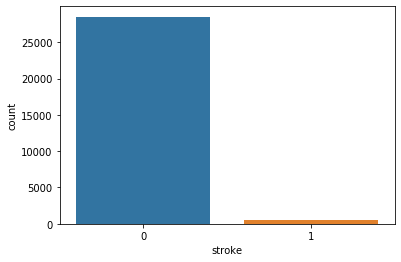

In [75]:
sns.countplot(x='stroke',data=df)

In [76]:
df.shape

(29065, 11)

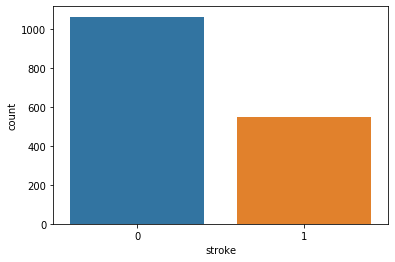

In [94]:
sns.countplot(x='stroke',data=df_copy)

In [77]:
df['stroke'].value_counts()

0    28517
1      548
Name: stroke, dtype: int64

In [78]:
from sklearn import preprocessing 

encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])

In [80]:
#Droping the data with stroke = 0
#It will help in balancing the dataset
df_copy = df.copy()
Stroke_0 = list(df_copy[df_copy.stroke ==0 ].sample(n=27452).index)
df_copy = df_copy.drop(df_copy.index[Stroke_0])
df_copy['stroke'].value_counts()

0    1065
1     548
Name: stroke, dtype: int64

In [81]:
X = df_copy.drop('stroke',axis=1)
y = df_copy['stroke']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

C:\Users\Priyank\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
y_pred = rfc.predict(X_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[173,  44],
       [ 37,  69]], dtype=int64)

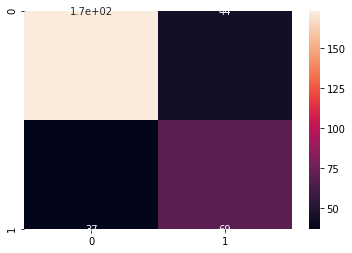

In [92]:
sns.heatmap(cm,annot=True)

In [93]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       217
           1       0.61      0.65      0.63       106

    accuracy                           0.75       323
   macro avg       0.72      0.72      0.72       323
weighted avg       0.75      0.75      0.75       323

